# Ejercicio de Regresion Logistica en Python 

Para comenzar se realizan los inport necesarios de los paquetes que se utilizan durante el Ejercicio.

In [4]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Carga del archivo csv (datos de entrada) 

El archivo csv (por simplicidad, se considera que estara en el mismo directorio que el archivo de notebook.ipynb) y se asigna mediante Pandas a la variable dataframe. Alutilizar el método dataframe.head() se visualiza en pantalla los 5 primeros registros.

In [6]:
dataframe = pd.read_csv(r"usuarios win-mac-lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


A continuacion se utiliza el método dataframe.describe() que proporciona estadistica descriptiva del conjunto de datos: media, desviacion estandar, valores minimo y maximo de cada atributo.


In [7]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


Se cuantifican resultados ce cada tipo usando la funcion groupby y se visualizan 86 usuarios “Clase 0”, es decir Windows, 40 usuarios Mac y 44 de Linux.


In [9]:
print(dataframe.groupby( 'clase' ).size())

clase
0    86
1    40
2    44
dtype: int64


##  Visualizamos los datos

Se realiza una visualizacion para conocer a los atributos caracteristicos de la informacion que se trabaja y su correlacion.
En formato de histograma a parecenloscuatro atributos de entrada etiquetados como: “duracién", “paginas”,”acciones” y “valor’. Se puede apreciar graficamenteentre qué valores se comprenden sus minimos y maximosy en quéintervalos se concentra la mayor densidad de registros.

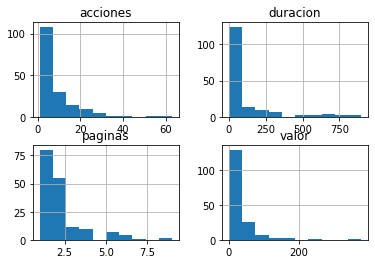

In [10]:
dataframe.drop(['clase'],1).hist() 
plt.show()


Además se pueden interrelacionar las entradas de a pares, para ver como se concentran linealmente las salidas de usuarios por colores: Sistema Operativo Windows en azul, Macintosh en verde y Linux en rojo.

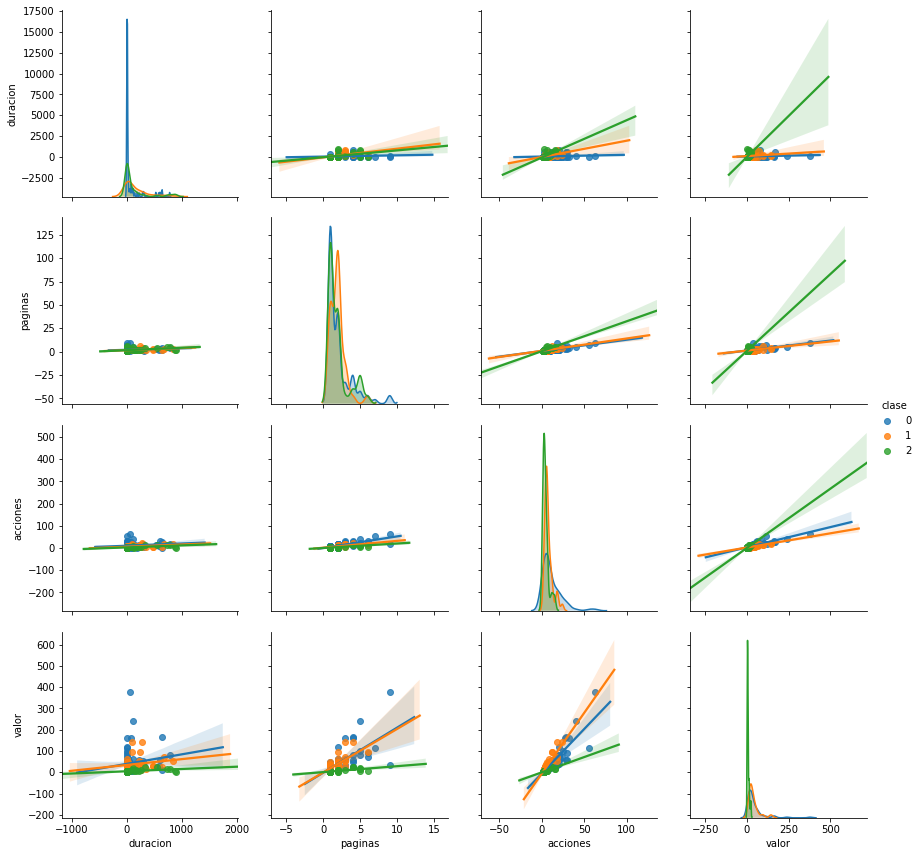

In [11]:

sb.pairplot(dataframe.dropna(), hue='clase',height=3,vars=["duracion", "paginas","acciones","valor"],kind='reg')

## Se establece el modelo de R Log 

Se cargan los atributos de las 4 columnas de entrada en X excluyendo la columna “clase” con el método drop(). La columna “clase” se agrega al atributo y. Se ejecuta X.shape para comprobar la dimensión de la matriz con datos de entrada de 170 registros por 4 columnas.
